In [1]:
# importing modules and initialising the interactive mode

from IPython import get_ipython

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
get_ipython().run_line_magic('matplotlib', 'inline')
get_ipython().run_line_magic('matplotlib', 'notebook')
plt.ion()

In [2]:
def RMS_error(A,B,margin=1):
    TEMP = np.zeros((len(A[:,0]),len(A[0,:])))
    BIG_ERROR = np.zeros((len(A[:,0]),len(A[0,:])))
    TEMP = (A - B)**2
    get_ipython().run_line_magic('matplotlib', 'notebook')
    fig = plt.hist(np.sqrt(TEMP).flatten())
    stdev = np.sqrt(np.sum(TEMP)/(len(A[:,0])*len(A[0,:])))
    
    for i in range(len(A[:,0])):
        for j in range(len(A[0,:])):
            if np.sqrt(TEMP[i,j])>=stdev*margin:
                BIG_ERROR[i,j] = 1
    return stdev, BIG_ERROR

def abs_error(A,B,margin=1):
    TEMP = np.zeros((len(A[:,0]),len(A[0:,])))
    BIG_ERROR = np.zeros((len(A[:,0]),len(A[0,:])))
    TEMP = np.abs(A - B)
    get_ipython().run_line_magic('matplotlib', 'notebook')
    fig = plt.hist(np.sqrt(TEMP).flatten())
    abserror = np.sum(TEMP)/(len(A[:,0])*len(A[0,:]))
    
    for i in range(len(A[:,0])):
        for j in range(len(A[0,:])):
            if np.sqrt(TEMP[i,j])>= abserror * margin:
                BIG_ERROR[i,j] = 1
    return abserror, BIG_ERROR

<IPython.core.display.Javascript object>


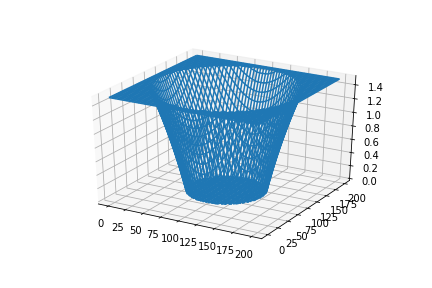

In [97]:
# uploading data and plotting the numerical solution for q1
fname = "../CPU_boundary_analysis/Q1_4f/Q13.csv"

Data = np.loadtxt(fname, delimiter=';')


X = np.array([[i for i in range(len(Data[0,:]))] for j in range(len(Data[:,0]))])

Y = np.array([[j for i in range(len(Data[0,:]))] for j in range(len(Data[:,0]))])

get_ipython().run_line_magic('matplotlib', 'notebook')
fig1 = plt.figure()
ax = fig1.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y , Data)

<IPython.core.display.Javascript object>


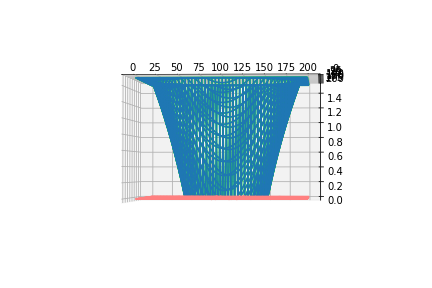

In [100]:
# defining and plotting the analytical solution to q1
def analq1(V,a,b,centre_x,centre_y,x,y):
    """
    V - potential at the further boundary
    a - radius of inner circle
    b - radius of outer circle
    x, y - coordinates
"""
    dist = (centre_x-x)**2+(centre_y-y)**2
    if dist<a**2:
        V_out=0
    elif dist>b**2:
        V_out=V
    else:
        V_out=V*(np.log(np.sqrt(dist)/a)/np.log(b/a))
    return V_out

Analsol = np.zeros((len(Data[:,0]),len(Data[0,:])))
for i in range(len(Data[:,0])):
    for j in range(len(Data[0,:])):    
        Analsol[i][j] = analq1(1.5,50,90,100,100,X[i][j],Y[i][j])

get_ipython().run_line_magic('matplotlib', 'notebook')
fig2 = plt.figure()
ax1 = fig2.add_subplot(111, projection='3d')
ax1.plot_wireframe(X, Y, Data, colors=[(0,1,0,1)])
ax1.plot_wireframe(X, Y , Analsol)
ax1.plot_wireframe(X, Y, Data-Analsol,colors=[(1,0.5,0.5,1)])

<IPython.core.display.Javascript object>


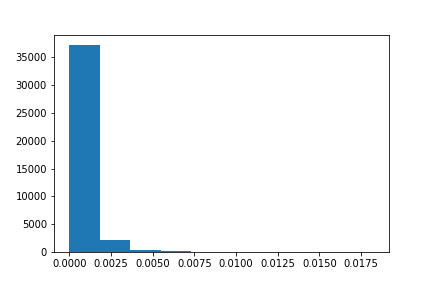

0.0012452557538967567


In [99]:
stdev, big_error = RMS_error(Data,Analsol,margin=2)
print(stdev)

<IPython.core.display.Javascript object>


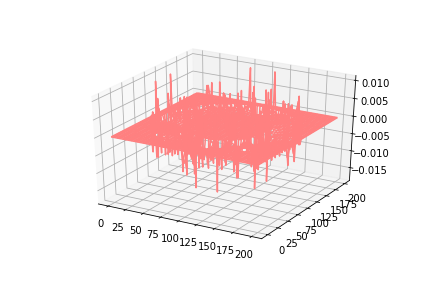

In [102]:
ERR_X = []
ERR_Y = []
ERR_Z = []
for i in range(len(Data[:,0])):
        for j in range(len(Data[0,:])):
            if big_error[i,j]:
                ERR_X.append(X[i,j])
                ERR_Y.append(Y[i,j])
                ERR_Z.append(Data[i,j])

get_ipython().run_line_magic('matplotlib', 'notebook')
fig2 = plt.figure()
ax1 = fig2.add_subplot(111, projection='3d')
#ax1.scatter(ERR_X, ERR_Y, ERR_Z, c=(1,0,0))
ax1.plot_wireframe(X, Y,np.array(Data-Analsol),colors=[(1,0.5,0.5,1)])

<IPython.core.display.Javascript object>


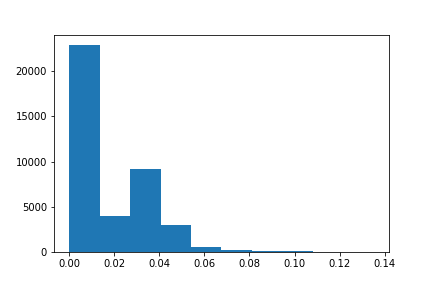

0.000593628178149846


In [103]:
stdev, big_error = abs_error(Data,Analsol)
print(stdev)